In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [36]:
data = pd.read_csv("droppy_hours_cumul.csv", sep=";", index_col="day", parse_dates=True, dayfirst=True) 
data["cumul"] = round(data.iloc[:,:-2].sum(axis=1),2)
data.to_csv('droppy_fin.csv')

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,cumul,Jour
day,,,,,,,,,,,,,,,,,,,,,
2021-10-01,0.0,0.0,0.0,0.0,0.0,0.0,7.3,2.4,25.0,0.1,...,14.2,2.9,0.0,0.0,0.0,0.0,0.0,0.0,105.0,VEN
2021-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAM
2021-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIM
2021-10-04,0.0,0.0,0.0,0.0,0.0,0.0,11.6,0.0,16.3,22.1,...,11.5,1.8,1.4,0.0,0.0,0.0,0.0,0.0,144.4,LUN
2021-10-05,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,17.9,10.4,...,5.4,1.6,0.3,0.0,1.4,0.0,0.0,0.0,115.3,MAR


In [15]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

encoder = OrdinalEncoder()
X = encoder.fit_transform(data)

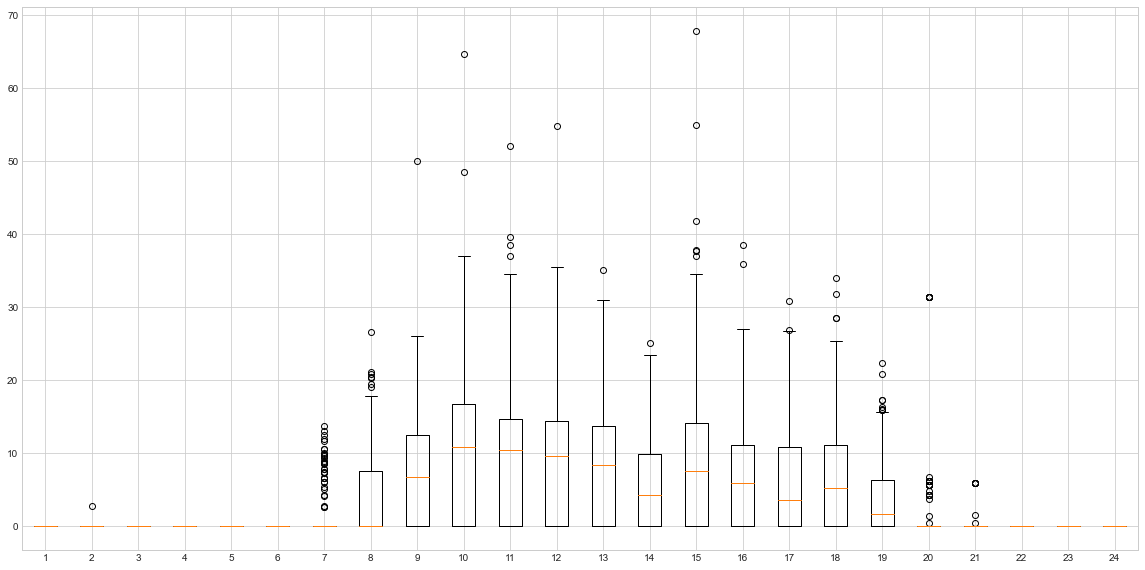

In [16]:
plt.figure(figsize=(20,10))
plt.boxplot(data.iloc[:,:-2]);

In [17]:
num_cols = data.iloc[:,:-1].columns

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
X_pca

array([[ 4.00728140e+00, -5.30840839e+01],
       [-1.34401623e+02, -9.79088775e+00],
       [-1.34417003e+02, -9.83752092e+00],
       [ 7.15086975e+01, -1.83380779e+01],
       [ 3.49295473e+01, -1.81120283e+00],
       [-4.64582625e+00,  3.80268086e+01],
       [ 6.67031576e+01,  3.03452744e+01],
       [ 9.43813822e+01,  7.03557675e+00],
       [-3.19579097e+01,  9.13704675e+01],
       [-1.34417003e+02, -9.83752092e+00],
       [-1.38416183e+01, -2.30550070e+01],
       [ 6.56573087e+00,  2.09181262e+01],
       [ 4.59930904e+01,  1.95093787e+01],
       [ 4.16344632e+01, -3.43058266e+01],
       [-4.05399132e+00,  4.60731553e+01],
       [-1.34401623e+02, -9.79088775e+00],
       [-1.34417003e+02, -9.83752092e+00],
       [-1.34410851e+02, -9.81886765e+00],
       [ 2.11891168e+01, -4.19830879e+01],
       [-8.11760426e+00,  2.86127600e+01],
       [ 7.96294058e+01, -2.96951675e+01],
       [ 1.17087786e+01,  1.87438032e+01],
       [-5.16580827e+01,  1.94360621e+01],
       [-1.

In [19]:
print(pca.explained_variance_ratio_.sum())

0.6034433004314466


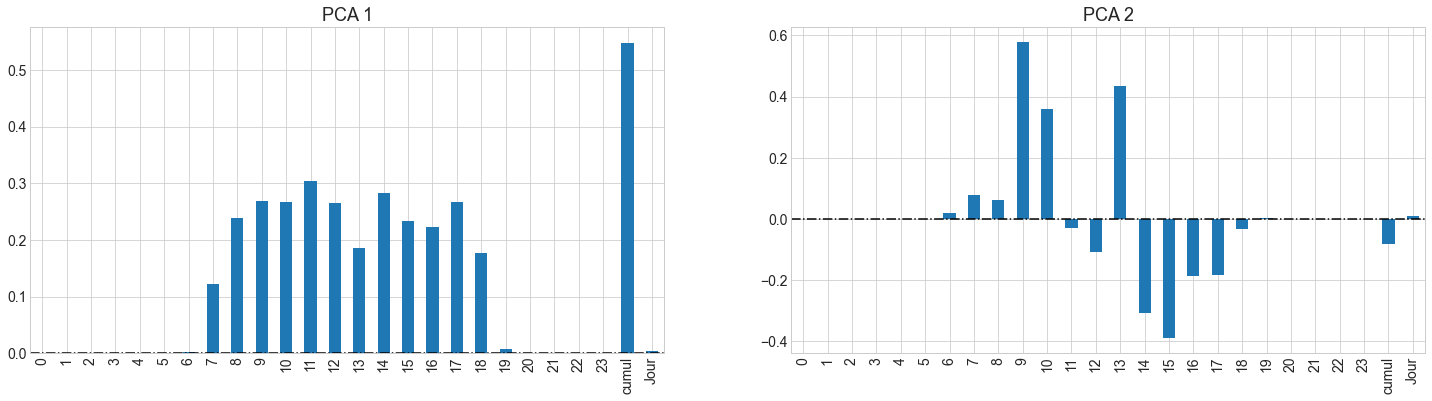

In [20]:
data_pca = pd.DataFrame(pca.components_, columns=data.columns)
plt.figure(figsize=(25,6))
plt.subplot(121)
data_pca.iloc[0,:].plot.bar(fontsize=14)
plt.title('PCA 1', fontsize=18)
plt.axhline(y=0, color='black', linestyle='-.')
plt.subplot(122)
data_pca.iloc[1,:].plot.bar(fontsize=14)
plt.title('PCA 2', fontsize=18)
plt.axhline(y=0, color='black', linestyle='-.')

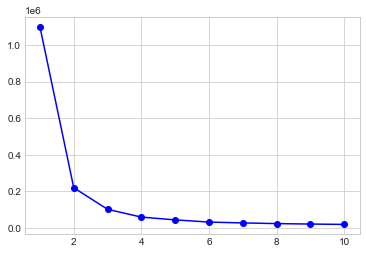

In [21]:
from sklearn.cluster import KMeans

wcss=[]
for k in range (1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca.fit_transform(data.iloc[:,:-1]))
    wcss.append(kmeans.inertia_)
plt.plot(range (1,11), wcss,'o-', c='b')

In [22]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(pca.fit_transform(data.iloc[:,:-1]))
labels = kmeans.labels_

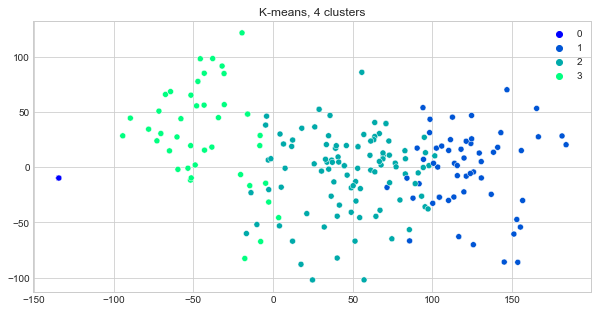

In [23]:
plt.figure(figsize=(10,5))
plt.title('K-means, 4 clusters')
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue=labels, palette='winter');

In [24]:
df = data.copy()
df['Cluster'] = labels
df.to_csv('cluster.csv')

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,cumul,Jour,Cluster
day,,,,,,,,,,,,,,,,,,,,,
2021-10-01,0.0,0.0,0.0,0.0,0.0,0.0,7.3,2.4,25.0,0.1,...,2.9,0.0,0.0,0.0,0.0,0.0,0.0,105.0,VEN,2
2021-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAM,0
2021-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIM,0
2021-10-04,0.0,0.0,0.0,0.0,0.0,0.0,11.6,0.0,16.3,22.1,...,1.8,1.4,0.0,0.0,0.0,0.0,0.0,144.4,LUN,1
2021-10-05,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,17.9,10.4,...,1.6,0.3,0.0,1.4,0.0,0.0,0.0,115.3,MAR,2


In [27]:
df.groupby('Cluster')['cumul'].agg(['mean','median'])

,mean,median
Cluster,,
0,0.000000,0.00
1,157.085714,152.05
2,120.958416,122.70
3,74.838095,72.65


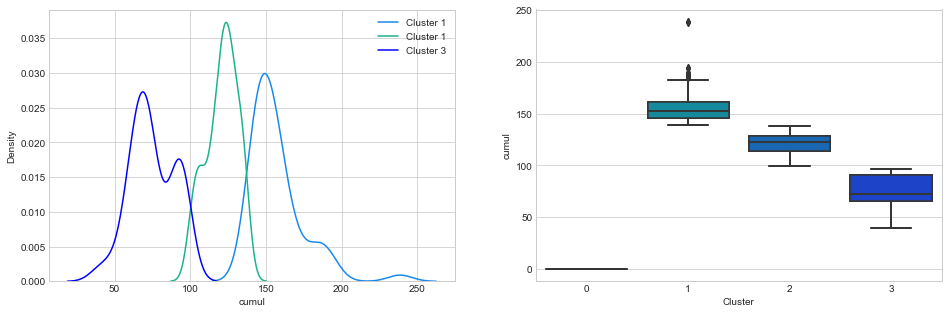

In [30]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df[df['Cluster']==0]['cumul'], hist=False, label= 'Cluster 0', color="#19b38c")
sns.distplot(df[df['Cluster']==1]['cumul'], hist=False, label= 'Cluster 1', color='#1689f0')
sns.distplot(df[df['Cluster']==2]['cumul'], hist=False, label= 'Cluster 1', color='#19b38c')
sns.distplot(df[df['Cluster']==3]['cumul'], hist=False, label= 'Cluster 3', color='blue')
plt.legend()
for cluster in np.sort(df['Cluster'].unique()):
        plt.subplot(122)
        sns.boxplot(x = 'Cluster', y='cumul', data=df, palette='winter_r')

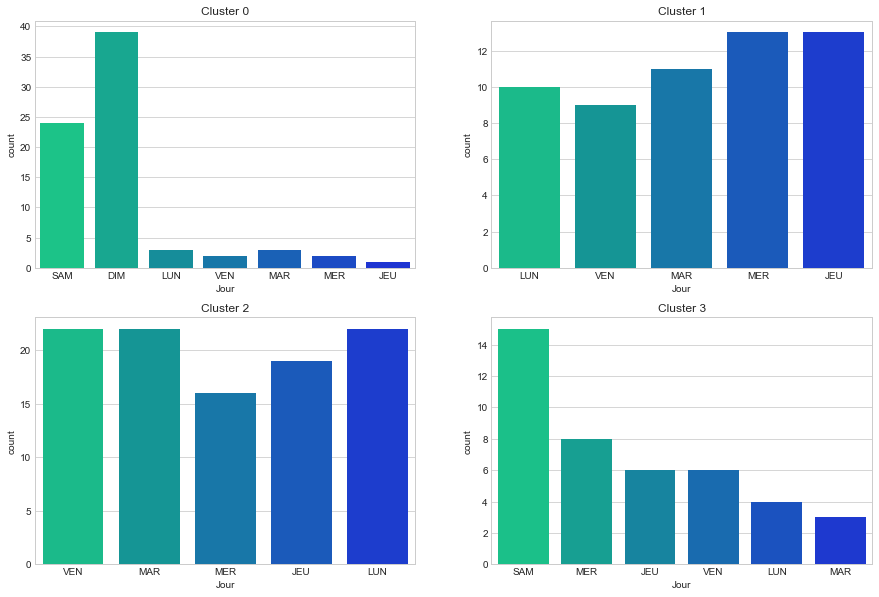

In [33]:
plt.figure(figsize=(15,10))
i=0
for cluster in np.sort(df['Cluster'].unique()):
        i+=1
        plt.subplot(2,2,i)
        sns.countplot(df[df['Cluster']==cluster]["Jour"], palette='winter_r')
        plt.title('Cluster {}'.format(cluster))

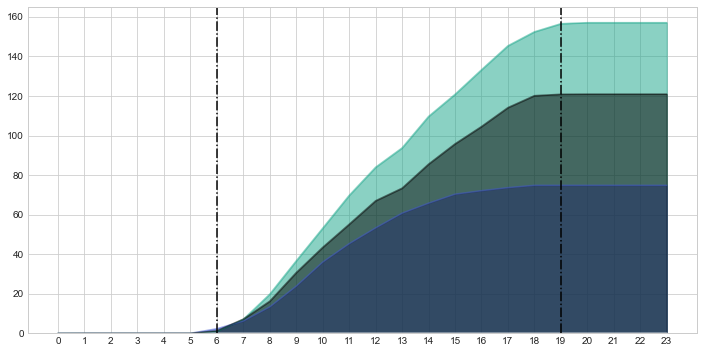

In [35]:
plt.figure(figsize=(12,6))
plt.yticks(np.arange(0,200,20))
plt.xticks(np.arange(0,24,1))
df[df['Cluster']==1].iloc[:,:-3].mean().cumsum().plot(kind='area',color='#17A589',  stacked=False)
df[df['Cluster']==3].iloc[:,:-3].mean().cumsum().plot(kind='area',color='#425ACF',  stacked=False)
df[df['Cluster']==0].iloc[:,:-3].mean().cumsum().plot(kind='area',color='white', stacked=False)
df[df['Cluster']==2].iloc[:,:-3].mean().cumsum().plot(kind='area',color='black', stacked=False)
plt.axvline(x = 6, c='black', linestyle='-.')
plt.axvline(x = 19, c='black', linestyle='-.')    